# 주제분석 2주차 패키지

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Chapter1 데이터 전처리

### 1. 데이터 불러오기

In [2]:
data = pd.read_csv('data.csv')

### 2. 데이터 확인

####  2-1. 데이터의 상위/하위 5개 항목 미리보기

In [3]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,TotalAcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,3,8,10,4,7,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,6,2,1,1,2,5,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,42,1,8,2,10,4,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,5,2,2,0,4,6,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,15,5,5,3,6,5,0,3,11,0


In [4]:
data.tail(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,TotalAcceptedCmp
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,247,2,9,3,4,5,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,8,7,8,2,5,7,0,3,11,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,24,1,2,3,13,6,0,3,11,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,61,2,6,5,10,3,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,21,3,3,1,4,7,0,3,11,1


#### 2-2. 데이터의 행과 열의 개수

In [5]:
print('이 데이터의 행과 열은 ', data.shape, '입니다.')

이 데이터의 행과 열은  (2240, 24) 입니다.


#### 2-3. 변수별 데이터 형식

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### 2-4. 결측치 확인
- column 별 데이터의 NA 개수를 확인하세요.

In [7]:
data.isna().apply(sum)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Z_CostContact           0
Z_Revenue               0
TotalAcceptedCmp        0
dtype: int64

#### 2-5. unique값 확인
- 전체 column의 unique 값 개수를 확인하고 불필요한 변수를 제거하세요.

In [8]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
Complain                  2
Z_CostContact             1
Z_Revenue                 1
TotalAcceptedCmp          6
dtype: int64

- `Education`과 `Marital_Status` 는 범주형 변수입니다. 두 변수의 unique 값과 그 개수를 확인하세요.

In [9]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [10]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

#### 2-6. 수치형 데이터의 통계값과 상관플랏

- 수치형 데이터의 통계값을 확인하세요.
- 상관플랏을 그려보세요.

In [11]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,TotalAcceptedCmp
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,3.0,11.0,0.446875
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,0.0,0.0,0.890543
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,3.0,11.0,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,3.0,11.0,5.000000


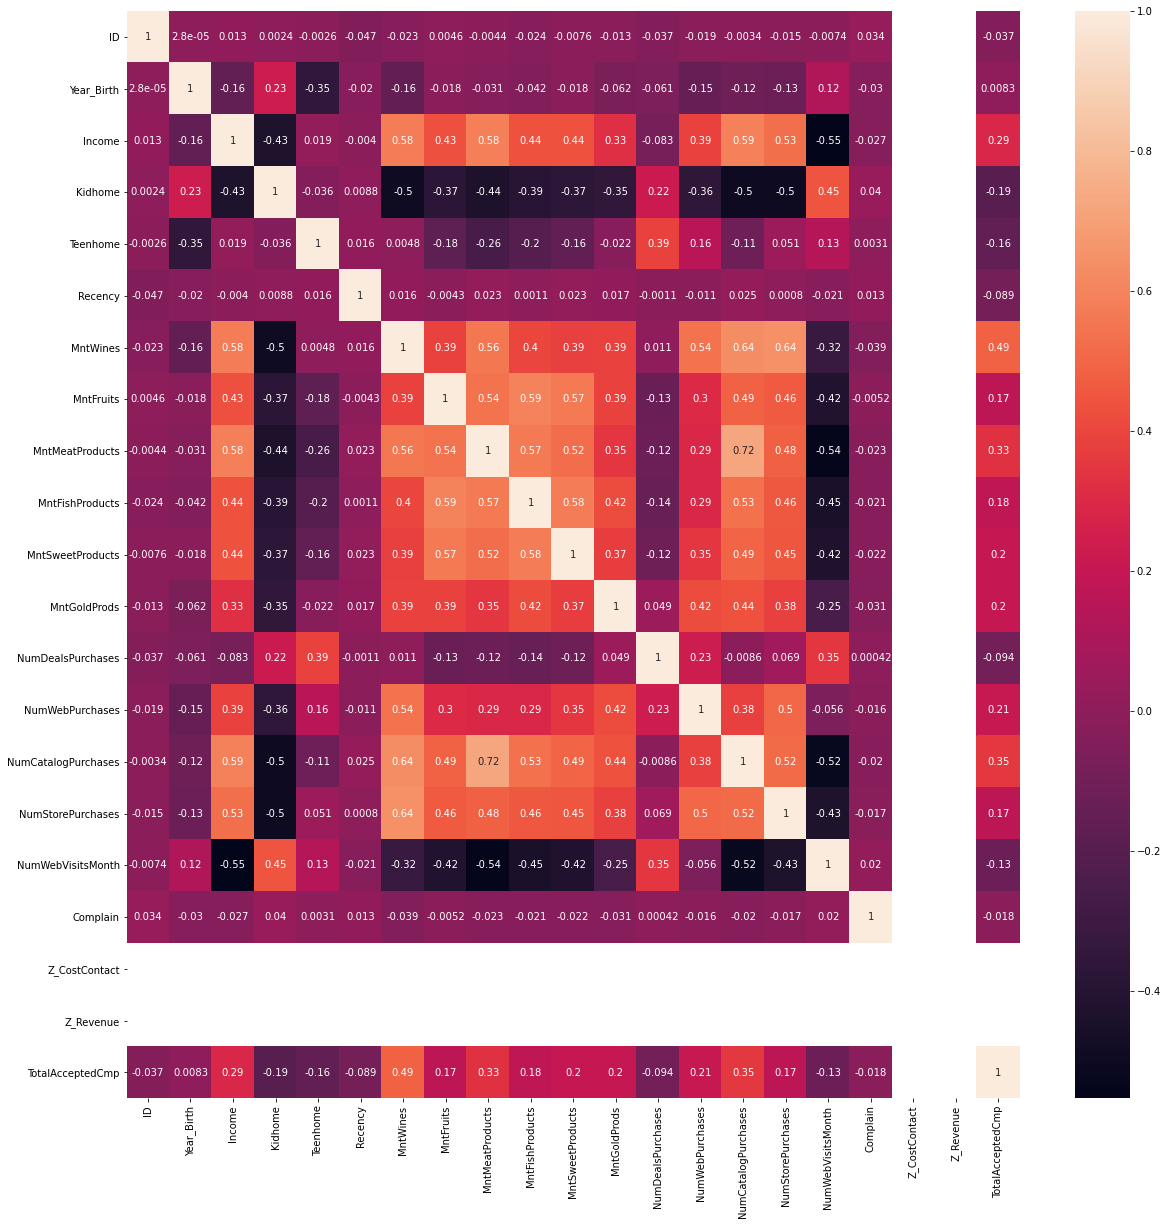

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

### 3. 불필요한 변수 제거
2-5의 결과를 바탕으로 불필요한 변수를 확인하고 제거하세요.

In [13]:
data = data.drop(columns=["ID","Z_CostContact", "Z_Revenue"],axis=1)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,172,88,88,3,8,10,4,7,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,111,21,42,1,8,2,10,4,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,10,3,5,2,2,0,4,6,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,46,27,15,5,5,3,6,5,0,0


### 4. 결측치 처리

2-4의 결과를 바탕으로 결측치를 해당 변수의 평균으로 대체하세요. 
결측치를 채운 후의 결과도 보여주세요.

In [14]:
data['Income'] = data['Income'].fillna(data['Income'].mean())
data.isna().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Complain               False
TotalAcceptedCmp       False
dtype: bool

### 5. 재범주화

#### 5-1. Marital Status
- Marital Status 는 7가지 범주로 나누어져 있습니다. 이를 배우자(또는 파트너)가 있는 상태 혹은 싱글인 상태, 이렇게 두 가지로 재범주화하려고 합니다. 
- `Married` 또는 `Togehter` 카테고리는 `Relationship`으로, 나머지 범주는 `Single` 범주로 재범주화하세요.
- 재범주화한 뒤 각각의 범주에 속하는 데이터의 개수를 확인하세요.

In [15]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [16]:
data['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

#### 5-2. Education
- Education는 총 5가지 범주로 나누어져 있습니다. 이를 `Undergraduate`, `Graduate`, `Postgraduate` 총 3가지 범주로 구분하려고 합니다. 
    - `Basic`과 `2n Cycle` 범주는 `Undergraduate`,
    - `Graduation` 범주는 `Graduate`,
    - `PhD`와 `Master` 범주는 `Postgraduate`로 구분하여 재범주화하세요.
- 재범주화한 뒤 각각의 범주에 속하는 데이터의 개수를 확인하세요.

In [17]:
data["Education"] = data["Education"].replace({"Basic":"Undergraduate",
                                               "2n Cycle":"Undergraduate",
                                               "Graduation":"Graduate",
                                               "Master":"Postgraduate",
                                               "PhD":"Postgraduate"})
data['Education'].value_counts()

Graduate         1127
Postgraduate      856
Undergraduate     257
Name: Education, dtype: int64

In [18]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'TotalAcceptedCmp'],
      dtype='object')

### 6. 변수명 변경
- 몇몇 변수들의 이름이 너무 길어서 간단한 이름으로 변경해려고 합니다.
- 컬럼명 앞에 `Mnt`가 붙어 있는 변수들은 모두 해당 상품군에 고객이 소비한 금액을 의미합니다. 공통적으로 들어가는 `Mnt`를 제거하여 `Wines`, `MeatProducts`, `FishProducts`, `SweetProducts`, `GoldProds`로 변경해봅시다. 
- 컬럼명 앞에 `Num`이 붙어 있는 변수들은 각각의 구매형식별 구매 건수를 의미합니다. 위와 같은 방식으로 공통적으로 들어가는 `Num`을 제거해봅시다.
- 바꿀 변수명을 하나씩 대응시켜도 되지만, replace 함수를 사용하면 더욱 간단하게 가능합니다.

In [19]:
data.columns = data.columns.str.replace("Mnt", "")
data.columns = data.columns.str.replace('Num', "")

### Chapter2. 파생변수 생성


### 1. 가정 내 어린이 수 및  부모 여부
- `Kidhome`과 `Teenhome`은 각각 가정 내 kid와 teenager의 수를 의미하는 변수입니다. 두 변수를 통해 가정 내 어린이 수를 나타내는 `Kids` 변수를 만들어봅시다.
- 아이가 한명이라도 있는 가정은 고객이 부모일 것이므로 부모 여부 변수 `Is_Parent` 변수를 만들어봅시다.

In [20]:
data['Kids'] = data['Kidhome'] + data['Teenhome']

In [21]:
data["Is_Parent"] = np.where(data.Kids> 0, 1, 0)

### 2. 나이
- `Year_Birth`는 태어난 년도를 의미하는 변수입니다. 이 변수를 이용해 올해(2021)년의 나이를 나타내는 `Age`변수를 만드세요.

In [22]:
data['Age'] = 2021 - data['Year_Birth']

### 3. 등록일로부터 일수
- `Dt_Customer`변수는 고객별 등록날짜를 나타내는 변수입니다. 이 변수와 오늘 날짜를 이용하여 등록일로부터 오늘까지의 일수를 계산하여 `Day_engaged` 변수를 만드세요.
- 날짜형 데이터로 변환하기 위해서는 pandas의 `to_datetime()` 함수를 사용해야 합니다.
- 오늘 날짜는 패키지를 풀고 있는 현재의 날짜를 기준으로 자유롭게 해주세요.


In [23]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Today'] = pd.to_datetime('27-10-2021')
data['Day_engaged'] = (data['Today'] - data['Dt_Customer']).dt.days

### 4. 총 소비 
- Mnt가 붙어있던 변수들(Wines, MeatProducts, FishProducts, SweetProducts, GoldProds)은 모두 해당 상품에 고객이 소비한 금액을 의미합니다. 
- 해당 변수들을 모두 더하여 총 소비금액 변수 `Expenses`를 만드세요.

In [24]:
data['Expenses'] = data['Wines'] + data['Fruits'] + data['MeatProducts'] + data['FishProducts'] + data['SweetProducts'] + data['GoldProds']

### 5. 불필요한 변수 삭제
- 파생변수를 만들 때 사용한 변수들(`Kidhome`,`Teenhome`,`Year_Birth`,`Dt_Customer`, `Today`)을 한꺼번에 삭제해주세요. 삭제할 변수명 list를 사용하면 편리합니다. 
- 전처리를 끝낸 데이터의 상위 5개 값을 보여주세요.


In [25]:
col_del = ['Kidhome', 'Teenhome', 'Year_Birth', 'Dt_Customer', 'Today']
data = data.drop(columns=col_del, axis=1)

In [26]:
pd.set_option('display.max_columns', 100)
data.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,MeatProducts,FishProducts,SweetProducts,GoldProds,DealsPurchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsMonth,Complain,TotalAcceptedCmp,Kids,Is_Parent,Age,Day_engaged,Expenses
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0,0,64,3488,1617
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,2,1,67,2642,27
2,Graduate,relationship,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,56,2989,776
3,Graduate,relationship,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,1,1,37,2582,53
4,Postgraduate,relationship,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,1,1,40,2838,422


## Chapter 3. 시각화

### 1. Bar Graph
- 범주형 변수인 Education과 Marital Status의 분포를 바 그래프로 그려봅시다.
- 예시 그래프의 palette는 `Set2`와 `husl`을 사용했지만, 자유롭게 사용하셔도 됩니다.

[Text(0.5, 1.0, 'Martial Status of Customers')]

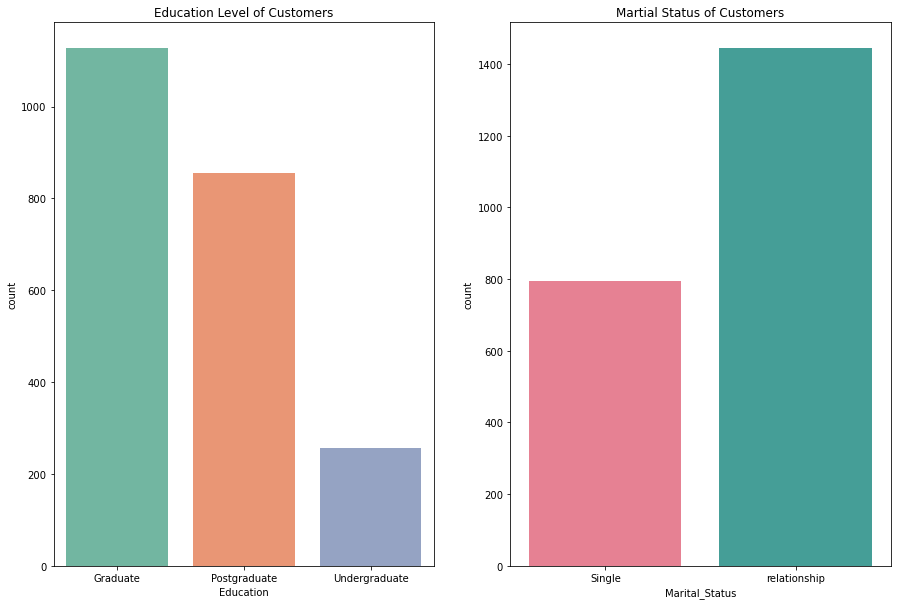

In [27]:
fig, axs = plt.subplots(ncols = 2, figsize = (15, 10))
sns.countplot(data=data, x='Education', palette='Set2', ax=axs[0]).set(title = "Education Level of Customers")
sns.countplot(data=data, x='Marital_Status', palette='husl',ax=axs[1]).set(title="Martial Status of Customers")

### 2-1. Histogram & Boxplot
- 고객들의 연령 분포를 히스토그램과 박스플랏으로 그려봅시다.
- pyplot의 subplots을 이용하여 다음과 같이 1행 2열로 두 그래프를 배치해보세요.

[Text(0.5, 0, 'Price'), Text(0.5, 1.0, 'Boxplot of Price')]

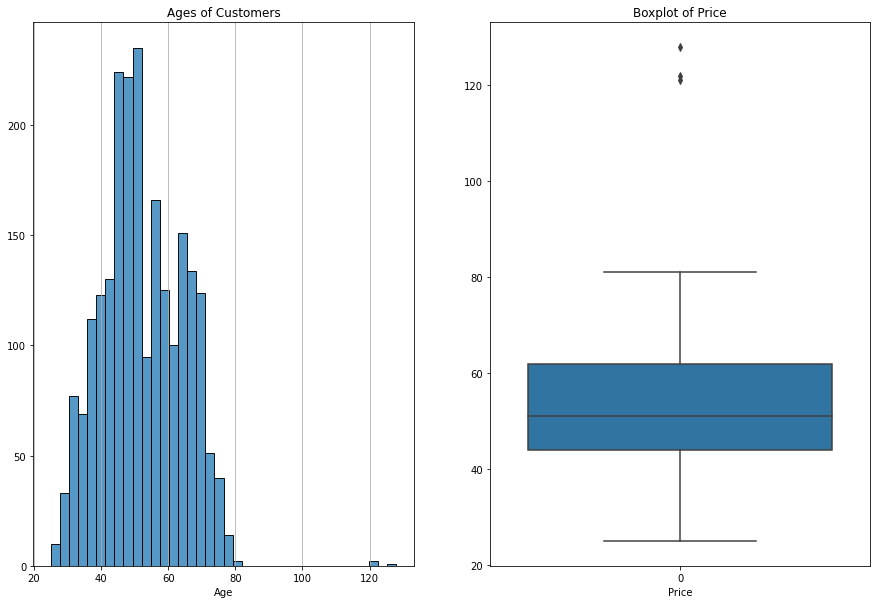

In [28]:
fig, axs = plt.subplots(ncols = 2, figsize = (15, 10))
sns.histplot(data = data['Age'], ax=axs[0]).set(title = 'Ages of Customers', ylabel=None, xlabel='Age')
axs[0].grid(axis='x')
sns.boxplot(data = data['Age'],  ax=axs[1]).set(xlabel='Price', title = 'Boxplot of Price')

- 그래프를 보면 이상치가 있다는 것을 알 수 있습니다. Age변수를 오름차순으로 정렬하여 나이가 120세가 넘는 고객을 확인한 뒤 제거하세요.
- 이상치를 제거한 뒤 다시 히스토그램과 박스플랏을 그려보세요.

In [29]:
data.sort_values(by='Age', ascending=False)['Age'].head()

239     128
339     122
192     121
1950     81
424      80
Name: Age, dtype: int64

In [30]:
data.drop([239, 339, 192], inplace = True)

[Text(0.5, 0, 'Price'), Text(0.5, 1.0, 'Boxplot of Price')]

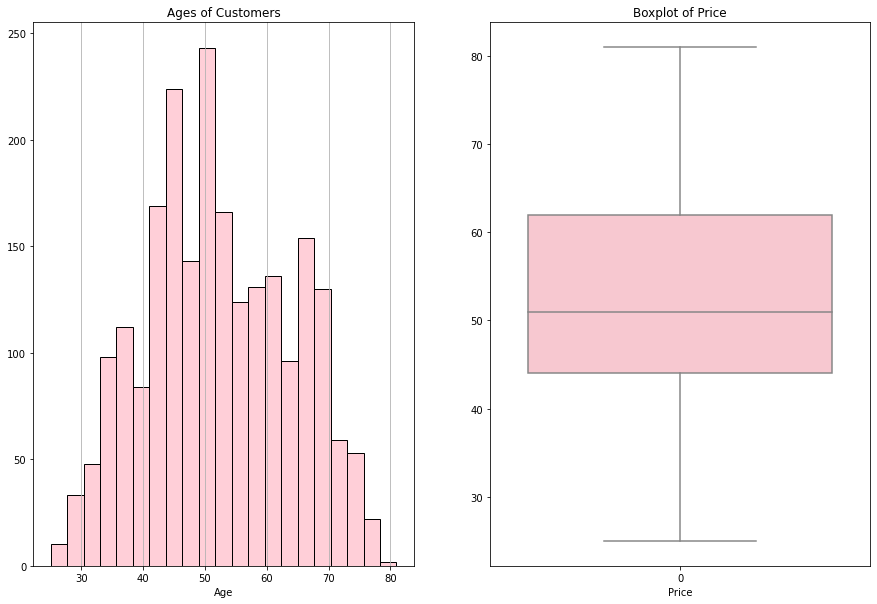

In [31]:
fig, axs = plt.subplots(ncols = 2, figsize = (15, 10))
sns.histplot(data = data['Age'], ax=axs[0], color='pink').set(title = 'Ages of Customers', ylabel=None, xlabel='Age')
axs[0].grid(axis='x')
sns.boxplot(data = data['Age'],  ax=axs[1], color='pink').set(xlabel='Price', title = 'Boxplot of Price')

### 2-2. Histogram
- 이번에는 Wines, MeatProducts, FishProducts, SweetProducts, GoldProds 변수들의 소비 금액 분포를 히스토그램으로 그려봅시다.
- pyplot의 subplots을 이용하여 다음과 같이 2행 2열로 4개의 그래프를 배치해보세요.
- 사용한 색상은 `darkorange`, `seagreen`, `lightcoral`, `mediumturquoise` 이지만, 자유롭게 사용하셔도 됩니다.
- 보기와 같이 x축과 y축 label을 표시하고, grid 선도 그려보세요. 반복되는 코드는 for문을 통해 간단히 할 수도 있습니다.

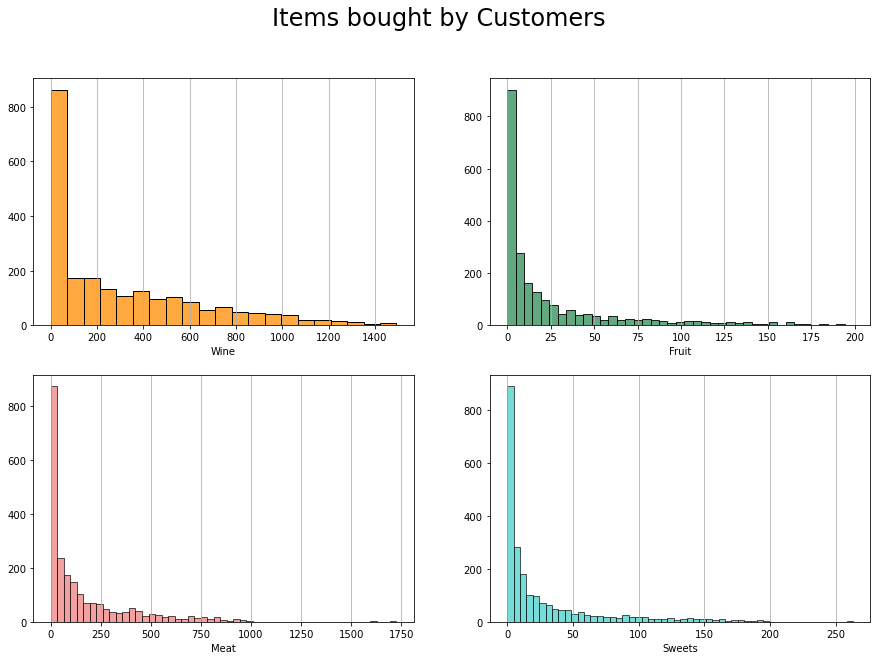

In [32]:
fig, ax = plt.subplots(2,2, figsize = (15,10))

sns.histplot(ax = ax[0,0], data = data.Wines, color = "darkorange")
sns.histplot(ax = ax[0,1], data = data.Fruits, color = "seagreen")
sns.histplot(ax = ax[1,0], data = data.MeatProducts, color = "lightcoral")
sns.histplot(ax = ax[1,1], data = data.SweetProducts, color = "mediumturquoise")

fig.suptitle("Items bought by Customers", fontsize = 24)

ax[0,0].set_xlabel("Wine")
ax[0,1].set_xlabel("Fruit")
ax[1,0].set_xlabel("Meat")
ax[1,1].set_xlabel("Sweets")

for num in [0,1]:
    for num2 in [0,1]:
        ax[num, num2].set_ylabel(None)
        ax[num, num2].grid(axis = "x")

### 3. Scatterplot
- 이번에는 부모 여부에 따른 수입과 와인 구매액의 관계를 scatterplot으로 그려보려고 합니다.
- `Income`, `Wines`, `Is_Parent` 변수를 사용하면 됩니다.
- 수입을 나타내는 `Income` 변수는 매우 큰 이상치가 있어서 그래프의 모양이 제대로 확인되지 않으므로 x축의 범위를 조정해서 0부터 200,000까지로 제한해줍니다.
- 플랏의 제목과 축의 제목은 보기와 같이 써주시고, 범례의 label도 다음과 같이 바꿔주세요.
- 그래프를 간단히 해석해주세요.

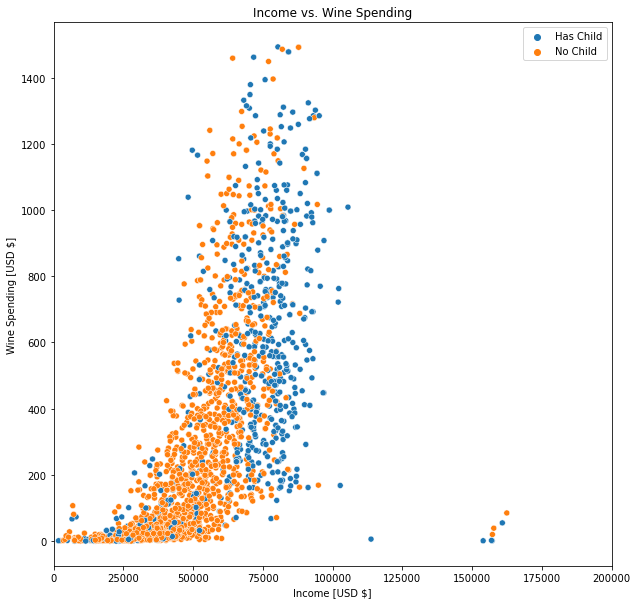

In [33]:
plt.figure(figsize=(10, 10))

ax = sns.scatterplot(data = data, x = "Income", y = "Wines", hue = "Is_Parent")
ax.set_title("Income vs. Wine Spending")
ax.set_xlabel("Income [USD $]")
ax.set_ylabel("Wine Spending [USD $]")

plt.xlim(0,200000)
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles,['Has Child', 'No Child'])